In [53]:
import poliastro as PA
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u

from poliastro.bodies import Earth, Body
from poliastro.twobody import Orbit
from poliastro.examples import iss

from scipy.stats import expon, uniform, norm, triang

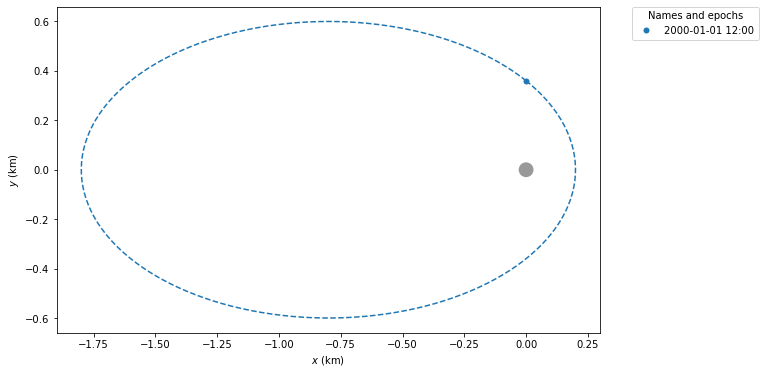

In [48]:
GM = Body(None, 1 * u.km**3 / u.s**2, "Central Body")
orb1 = Orbit.from_classical(GM, 1.0*u.km, 0.8*u.one, 0*u.deg, 0*u.deg, 90*u.deg, 90*u.deg)
orb1.plot()

In [49]:
orb1.period.to(u.second)

<Quantity 6.28318531 s>

In [50]:
orb

[0 x 1 km x 29.8 deg orbit around Central Body (None) at epoch J2000.000 (TT)]

90.0 deg
90.0 deg


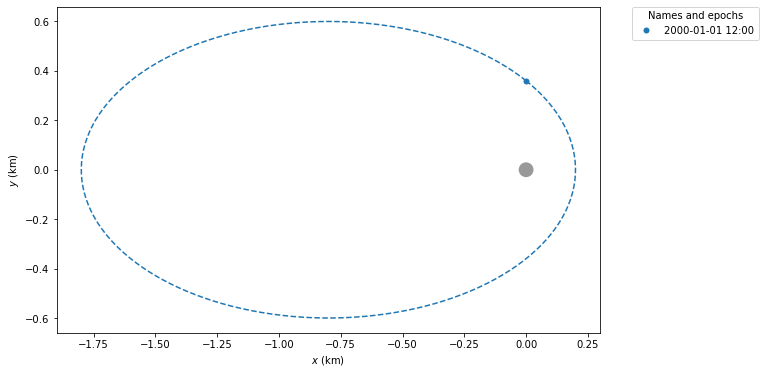

In [51]:
print(orb1.nu.to(u.deg))
orb1.propagate(3*u.second)
print(orb1.nu.to(u.deg))
orb1.plot()

In [4]:
a = np.square(J_1) * u.km
ecc = np.sqrt(1 - np.square(J_2/J_1)) * u.one
inc = np.arccos(J_3/J_2) * u.rad

GM = Body(None, 1 * u.km**3 / u.s**2, "Central Body")

orb = [None]*size
for i in range(0, size):
    orb[i] = Orbit.from_classical(GM, a[i], ecc[i], inc[i], Omega[i], w[i], M[i])


C:\Users\henhen724\anaconda3\lib\site-packages\astropy\units\decorators.py:252: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)


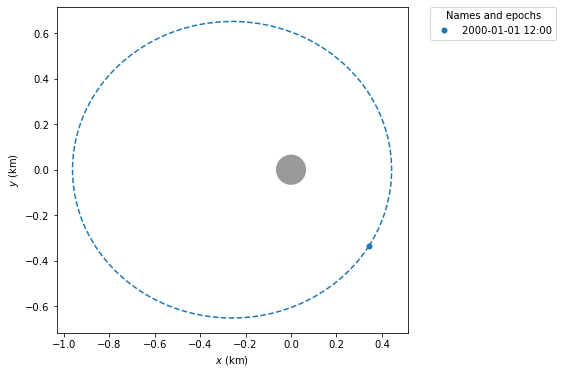

In [5]:
orb[0].plot()

In [12]:
steps = 100
avr_radius = np.zeros(2*steps) * u.km
for step in range(0, steps):
    for i in range(0, size):
        orb[i] = orb[i].propagate(1 * u.year)
        avr_radius[step] = avr_radius[step] + np.sqrt(np.square(orb[i].r[0]) + np.square(orb[i].r[1]) + np.square(orb[i].r[2]))
print(avr_radius)

[0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.7959

In [13]:
 for i in range(0, size):
        orb[i].r = orb[i].r + [1.0, 0.0, 0.0]*u.km

In [14]:
for step in range(0, steps):
    for i in range(0, size):
        orb[i] = orb[i].propagate(1 * u.year)
        avr_radius[step+steps] = avr_radius[step+steps] + np.sqrt(np.square(orb[i].r[0]) + np.square(orb[i].r[1]) + np.square(orb[i].r[2]))
print(avr_radius)

[0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984
 0.79596984 0.79596984 0.79596984 0.79596984 0.79596984 0.7959

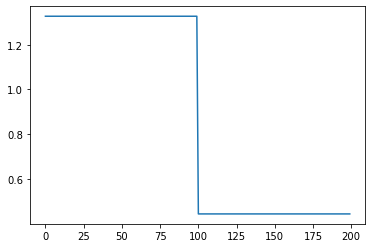

In [7]:
plt.plot(avr_radius)

In [8]:
steps = 100
avr_radius = np.zeros(2*steps) * u.km
for step in range(0, steps):
    for i in range(0, size):
        orb[i].propagate(1 * u.day)
        avr_radius[step] = avr_radius[step] + orb[i].r[0]
print(avr_radius)

[-0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0

In [9]:
 for i in range(0, size):
        orb[i].r = orb[i].r + [1.0, 0.0, 0.0]*u.km

In [10]:
for step in range(0, steps):
    for i in range(0, size):
        orb[i].propagate(1 * u.day)
        avr_radius[step+steps] = avr_radius[step+steps] + orb[i].r[0]
print(avr_radius)

[-0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0.28186477
 -0.28186477 -0.28186477 -0.28186477 -0.28186477 -0

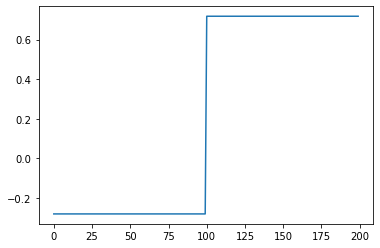

In [11]:
plt.plot(avr_radius)